# 3.1 MNIST

이 장에서는 고등학생과 미국인구조사국 직원들이 손으로 쓴 70000개의 작은 숫자 이미지를 모은 MNIST 데이터셋을 사용하겠다.

In [5]:
from sklearn.datasets import fetch_openml
mnist= fetch_openml('mnist_784',version=1)
mnist

{'data': array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 'target': array(['5', '0', '4', ..., '4', '5', '6'], dtype=object),
 'feature_names': ['pixel1',
  'pixel2',
  'pixel3',
  'pixel4',
  'pixel5',
  'pixel6',
  'pixel7',
  'pixel8',
  'pixel9',
  'pixel10',
  'pixel11',
  'pixel12',
  'pixel13',
  'pixel14',
  'pixel15',
  'pixel16',
  'pixel17',
  'pixel18',
  'pixel19',
  'pixel20',
  'pixel21',
  'pixel22',
  'pixel23',
  'pixel24',
  'pixel25',
  'pixel26',
  'pixel27',
  'pixel28',
  'pixel29',
  'pixel30',
  'pixel31',
  'pixel32',
  'pixel33',
  'pixel34',
  'pixel35',
  'pixel36',
  'pixel37',
  'pixel38',
  'pixel39',
  'pixel40',
  'pixel41',
  'pixel42',
  'pixel43',
  'pixel44',
  'pixel45',
  'pixel46',
  'pixel47',
  'pixel48',
  'pixel49',
  'pixel50',
  'pixel51',
  '

사이컷런에서 읽어 들인 데이터셋들은 일반적으로 비슷한 딕셔너리 구조를 가지고 있다.  
  
- 데이터셋을 설명하는 DESCR 키  
- 샘플이 하나인 행, 특성이 하나의 열로 구성된 배열을 가진 data 키  
- 레이블 배열을 담고 있는 target 키

In [6]:
import numpy as np
X, y = mnist["data"], mnist["target"]
y = y.astype(np.int)

In [7]:
X.shape

(70000, 784)

In [8]:
y.shape

(70000,)

이미지가 70000개가 있고 이미지에는 784개의 특성이 있다. 이미지가 28＊28 픽셀이기 때문이다. 

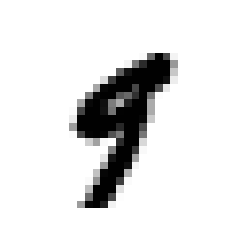

In [9]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

some_digit=X[36000]
some_digit_image=some_digit.reshape(28,28)
plt.imshow(some_digit_image, cmap=matplotlib.cm.binary,
          interpolation="nearest")
plt.axis("off")
plt.show()

In [10]:
y[36000]

9

In [11]:
X_train, X_test, y_train, y_test=X[:60000],X[60000:],y[:60000], y[60000:]

조사하기 전에 항상 테스트 세트를 만들고 따로 떼어놓아야 한다. (훈련세트 60000개, 테스트 세트 10000개 이미지로 나누어 놓았다)

훈련세트를 섞어서 모든 교차 검증 폴드가 비슷해지도록 만들겠다.  
어떤 학습 알고리즘은 훈렴 샘플 순서에 민감해서 많은 비슷한 샘플이 연이어 발생하면 성능이 나빠진다. 데이터셋을 섞으면 이런 문제를 방지할 수 있다.

# 3.2 이진 분류기 훈련

In [12]:
import numpy as np

shuffle_index=np.random.permutation(60000)
X_train, y_train = X_train[shuffle_index],y_train[shuffle_index]

In [13]:
y_train_9 = (y_train == 9)
y_test_9 = (y_test == 9)

In [14]:
from sklearn.linear_model import SGDClassifier

sgd_clf=SGDClassifier(max_iter=5, random_state=42)
sgd_clf.fit(X_train, y_train_9)

C:\Users\hyojung\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=5,
              n_iter_no_change=5, n_jobs=None, penalty='l2', power_t=0.5,
              random_state=42, shuffle=True, tol=0.001, validation_fraction=0.1,
              verbose=0, warm_start=False)

확률적 경사하강법(SGD)분류기는 매우 큰 데이터셋을 효율적으로 처리하는 장점을 가졌다.  
SGD가 한 번에 하나씩 훈련 샘플을 독립적으로 처리하기 때문이다. 훈련하는데 무작위성을 사용한다. 그러므로 random_state를 지정해야 한다.

In [15]:
sgd_clf.predict([some_digit])


array([False])

# 3.3 성능 측정

## 3.3.1 교차검증을 사용한 정확도 측정

**StratifiedKFold**는 클래스별 비율이 유지되도록 폴드를 만들기 위해 계층적 샘플링을 수행한다.  
매 반복에서 분류기 객체를 복제하여 훈련 폴드로 훈련시키고 테스트 폴드로 예측을 만든다.  
그런 다음 올바른 예측의 수를 세어 정확한 예측의 비율을 출력한다.


In [18]:
from sklearn.model_selection import cross_val_score
cross_val_score(sgd_clf, X_train, y_train_9, cv=3, scoring="accuracy")

C:\Users\hyojung\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\hyojung\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\hyojung\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([0.9336 , 0.9353 , 0.90935])

정확도가 모두 90% 이상이다. 모든 이미지를 '9 아님' 클래스로 분류하는 더미 분류기를 만들어 비교해보자

In [17]:
from sklearn.base import BaseEstimator

class Never9Classifier(BaseEstimator):
    def fit(self,x,y=None):
        pass
    def predict(self,x):
        return np.zeros((len(x),1),dtype=bool)

In [19]:
never_9_clf=Never9Classifier()
cross_val_score(never_9_clf, X_train, y_train_9, cv=3, scoring="accuracy")

array([0.903  , 0.89975, 0.8998 ])

정확도가 89% 이상으로 나왔다. 이미지의 10% 정도만 숫자 9이기 때무에 무조건 '9 아님'으로 예측하면 정확히 맞출 확률이 89%이다.  
이 예제는 정확도를 분류기 성능 측정 지표로 선호하지 않는 이유를 보여준다. 특히 **불균현 한 데이터셋**을 다룰 때 더욱 그렇다.

## 3.3.2 오차 행렬

분류기의 성능을 평가하는 더 좋은 방법은 **오차행렬**을 조사하는 것이다.   
예를 들어 숫자 9의 이미지를 3으로 잘못 분류한 횟수를 알고 싶다면 9행 3열을 보면 된다.

In [20]:
from sklearn.model_selection import cross_val_predict

y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_9, cv=3)

C:\Users\hyojung\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\hyojung\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\hyojung\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


cross_val_predict() 함수는 K-겹 교차 검증을 수행하지만 평가 점수를 반환하지 않고 각 테스트 폴드에서 얻은 예측을 반환한다.  
즉, 훈련 세트의 모든 샘플에 대해 깨끗한 예측을 얻게 된다.

In [21]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train_9, y_train_pred)

array([[50922,  3129],
       [ 1306,  4643]], dtype=int64)

오차 행렬의 행은 **실제 클래스**를 나타내고 열은 **예측한 클래스**를 나타낸다.  
행렬의 첫 번째 행은 '9 아님' 이미지에 대한 것으로, 50922개를 '9 아님'으로 정확하게 분류했고 나머지 3129개는 '9'라고 잘못 분류했다.  
두 번째 행은 '9'이미지에 대한 것으로, 1306개를 '9 아님'으로 잘못 분류했고 나머지 4643개를 정확히 '9'라고 분류했다.  
완벽한 분류기 라면 대각선만 0이 아닌 값이 된다.

$$ 정밀도 = \frac{TP}{TP+FP} $$


- TP는 진짜 양성의 수 이고, FP는 거짓 양성의 수 이다.  
- 이는 분류기가 다른 모든 양성 샘플을 무시하기 때문에 그리 유용하지 않다.


$$ 재현율 = \frac{TP}{TP+FN}$$


- 재현율이라는 또 다른 지표와 같이 사용하는 것이 일반적이다.  
- 재현율은 분류기가 정확하게 감지한 양성 샘플의 비율
- FN은 거짓 음성의 수

## 3.3.3 정밀도와 재현율

In [23]:
from sklearn.metrics import precision_score, recall_score
precision_score(y_train_9, y_train_pred)

0.5974009264024704

9로 판별된 이미지 중 59%만 정확하다.  


In [24]:
4639/(1838+4639)

0.7162266481395708

In [25]:
recall_score(y_train_9, y_train_pred)

0.780467305429484

정밀도와 재현율을 F_1점수 라고 하는 하나의 숫자로 만들면 편리할 때가 많다. F_1점수는 정밀도와 재현율의 조화평균이다.  
  
    
    

$$ F_1 = \frac{2}{\frac{1}{정밀도}+\frac{1}{재현율}} = 2 * \frac{정밀도 * 재현율}{정밀도 + 재현율} = \frac{TP}{TP + \frac{FN + FP}{2}}$$

In [26]:
from sklearn.metrics import f1_score
f1_score(y_train_9,y_train_pred)

0.6767728299686612



- 상황에 따라 정밀도가 중요할 수도 있고 재현율이 중요할 수도 있다.   
- 정밀도를 올리면 재현율이 줄고 그 반대도 마찬가지 이다 이를 **정밀도/재현율 트레이드오프** 라고 한다.



## 3.3.4 정밀도/재현율 트레이드오프

SGDClassfier는 **결정 함수**를 사용하여 각 샘플의 점수를 계산한다. 이 점수가 임곗값보다 크면 샘플을 양성 클래스에 할당하고 그렇지 않으면 음성 클래스에 할당한다. 

In [27]:
y_scores=sgd_clf.decision_function([some_digit])
y_scores

array([-47641.504583])

In [28]:
threshold = 0
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

임곗값이 0 이므로 위 코드는 False를 반환

In [29]:
threshold = 200000
y_some_digit_pred = (y_scores > threshold)
y_some_digit_pred

array([False])

In [30]:
y_scores=cross_val_predict(sgd_clf, X_train, y_train_9, cv=3,
                          method="decision_function")

C:\Users\hyojung\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\hyojung\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\hyojung\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


적절한 임곗값을 구하기 위해서는 먼저 cross_cal_predict()함수를 사용해 훈련 세트에 있는 모든 샘플의 점수를 구해야 한다.  
precision_recall_curve() 함수를 사용하여 사용 가능한 모든 임곗값에 대해 정밀도와 재현율을 계산할 수 있다.

In [31]:
from sklearn.metrics import precision_recall_curve

precisions, recalls, thresholds = precision_recall_curve(y_train_9, y_scores)

In [45]:
import matplotlib as mpl
from matplotlib import font_manager, rc
import platform

if platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
    mpl.rcParams['axes.unicode_minus'] = False

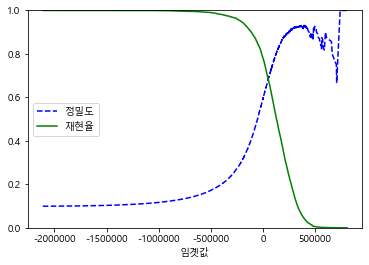

In [46]:

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="정밀도")
    plt.plot(thresholds, recalls[:-1],"g-", label="재현율")
    plt.xlabel("임곗값")
    plt.legend(loc="center left")
    plt.ylim([0,1])
plot_precision_recall_vs_threshold(precisions, recalls, thresholds)
plt.show()

In [47]:
y_train_pred_90 = (y_scores > 70000)

In [48]:
precision_score(y_train_9, y_train_pred_90)

0.7175960813865863

In [49]:
recall_score(y_train_9, y_train_pred_90)

0.6402756765842998

## 3.3.5 ROC 곡선
ROC곡선도 이진 분류에서 널리 사용하는 도구이다. 거짓 양성 비율에 대한 진짜 양성 비율의 곡선이다.  
양성으로 잘못 분류된 음성 샘플의 비율이 FPR이다. 이는 1에서 음성으로 정확하게 분류한 음성 샘플의 비율인 진짜 음성 비율을 뺀 값이다.  
TNR을 특이도라고도 한다. **민감도**에 대한 **1-특이도**그래프 이다.

In [50]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_train_9, y_scores)

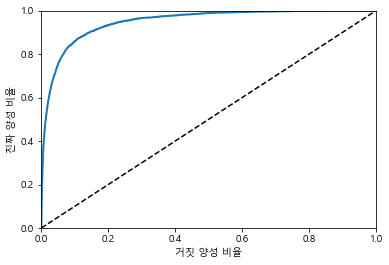

In [51]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr,tpr, linewidth=2, label=label)
    plt.plot([0,1],[0,1],'k--')
    plt.axis([0,1,0,1])
    plt.xlabel('거짓 양성 비율')
    plt.ylabel('진짜 양성 비율')

plot_roc_curve(fpr, tpr)
plt.show()

In [52]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_train_9, y_scores)

0.9484189675005427

ROC 곡선이 정밀도/재현율(PR) 곡선과 비슷한데 어떤것을 사용해야 할까?  
  
일반적인 법칙은 양성 클래스가 드물거나 거짓 음성보다 거직 양성이 더 중요할 때 PR 곡선을 사용하고 그렇지 않으면 ROC 곡선을 사용한다.

# 3.4 다중 분류

**다중 분류기**는 둘 이상의 클래스를 구별 할 수 있다.   
이미지를 분류할 때 각 분류기의 결정 점수 중에서 가장 높은 것을 클래스로 선택하는 것을 **일대다(OvA)** 전략이라고 한다.  
또 다른 전략은 0과 1 구별, 1과 2 구별 등 과 같이 각 숫자의 조합마다 이진 분류기를 훈련시키는 것을 **일대일(OvO)** 전략이라고 한다.

클래스가 N개 라면 분류기는 $\frac{N*(N-1)}{2}$개가 필요하다.  
SVM같은 알고리즘은 Train Set의 크기에 민감하기 때문에 작은 Train Set에서 여러개의 분류기를 학습시키는 것이 빠르기 때문에 OvO를 사용하지만, 대부분의 이진 분류 알고리즘은 OvA를 사용한다.  
  
Scikit-Learn에서는 이진 분류 알고리즘을 이용해 다중 분류를 수행할 경우 자동으로 OvA(또는 SVM일 경우 OvO)를 적용해 학습한다.


In [53]:
from sklearn.ensemble import RandomForestClassifier

forest_clf= RandomForestClassifier(random_state=42)
y_probas_forest = cross_val_predict(forest_clf, X_train, y_train_9, cv=3,
                                   method="predict_proba")

C:\Users\hyojung\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\hyojung\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Users\hyojung\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [54]:
y_scores_forest = y_probas_forest[:,1]
fpr_forest, tpr_forest, thresholds_forest = roc_curve(y_train_9, y_scores_forest)

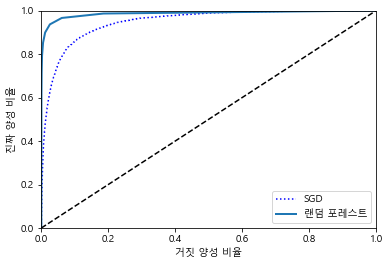

In [55]:
plt.plot(fpr, tpr, "b:", label="SGD")
plot_roc_curve(fpr_forest, tpr_forest, "랜덤 포레스트")
plt.legend(loc="lower right")
plt.show()

In [56]:
roc_auc_score(y_train_9,y_scores_forest)

0.9865651669278972

In [57]:
sgd_clf.fit(X_train, y_train)
sgd_clf.predict([some_digit])

C:\Users\hyojung\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([4])

In [58]:
some_digit_scores=sgd_clf.decision_function([some_digit])
some_digit_scores

array([[-638600.97967605, -333181.77180112, -807276.36397194,
        -182933.0266187 ,  -43879.58385049, -268981.04775175,
        -749948.62128054, -312137.60088065, -221352.62265683,
        -132478.53935164]])

In [59]:
np.argmax(some_digit_scores)

4

In [65]:
from sklearn.multiclass import OneVsOneClassifier

ovo_clf = OneVsOneClassifier(SGDClassifier(max_iter=5, random_state=42))
ovo_clf.fit(X_train, y_train)

C:\Users\hyojung\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\hyojung\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\hyojung\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\hyojung\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\hyojung\Anaconda3\lib\site-

C:\Users\hyojung\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\hyojung\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\hyojung\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\hyojung\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\hyojung\Anaconda3\lib\site-

OneVsOneClassifier(estimator=SGDClassifier(alpha=0.0001, average=False,
                                           class_weight=None,
                                           early_stopping=False, epsilon=0.1,
                                           eta0=0.0, fit_intercept=True,
                                           l1_ratio=0.15,
                                           learning_rate='optimal',
                                           loss='hinge', max_iter=5,
                                           n_iter_no_change=5, n_jobs=None,
                                           penalty='l2', power_t=0.5,
                                           random_state=42, shuffle=True,
                                           tol=0.001, validation_fraction=0.1,
                                           verbose=0, warm_start=False),
                   n_jobs=None)

In [60]:
sgd_clf.classes_

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [61]:
sgd_clf.classes_[5]

5

In [62]:
from sklearn.multiclass import OneVsOneClassifier
ovo_clf = OneVsOneClassifier(SGDClassifier(max_iter=5, random_state=42))
ovo_clf.fit(X_train, y_train)
ovo_clf.predict([some_digit])

C:\Users\hyojung\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\hyojung\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\hyojung\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\hyojung\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\hyojung\Anaconda3\lib\site-

C:\Users\hyojung\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\hyojung\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\hyojung\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\hyojung\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\hyojung\Anaconda3\lib\site-

array([9])

In [63]:
len(ovo_clf.estimators_)

45

In [66]:
forest_clf.fit(X_train, y_train)

C:\Users\hyojung\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [67]:
forest_clf.predict([some_digit])

array([9])

In [68]:
forest_clf.predict_proba([some_digit])

array([[0. , 0. , 0. , 0.1, 0.1, 0. , 0. , 0. , 0. , 0.8]])

0.8은 모델이 이 이미지가 9일 가능성을 80%로 추정 한다는 뜻이다.

In [69]:
cross_val_score(sgd_clf, X_train, y_train, cv=3, scoring="accuracy")

C:\Users\hyojung\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\hyojung\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\hyojung\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([0.86427714, 0.87959398, 0.86888033])

모든 테스트 폴드에서 86% 이상을 얻었다. 랜덤 분류기를 사용했다면 10% 정확도를 얻었을 것이므로 이 점수가 아주 나쁘지는 않지만 성능을 더 높일 여지가 있다. 예를 들어 스케일 조정을 하면 90% 이상으로 높일 수 있다.

In [70]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train.astype(np.float64))
cross_val_score(sgd_clf, X_train_scaled, y_train, cv=3, scoring="accuracy")

C:\Users\hyojung\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\hyojung\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\hyojung\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([0.91141772, 0.91049552, 0.90723609])

# 3.5 에러분석

In [71]:
y_train_pred= cross_val_predict(sgd_clf, X_train_scaled, y_train, cv=3)
conf_mx= confusion_matrix(y_train, y_train_pred)
conf_mx

C:\Users\hyojung\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\hyojung\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)
C:\Users\hyojung\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:561: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning)


array([[5739,    2,   23,    9,   11,   46,   45,    7,   36,    5],
       [   2, 6482,   45,   27,    5,   43,    8,   12,  106,   12],
       [  57,   33, 5343,   98,   80,   28,   88,   54,  160,   17],
       [  50,   38,  139, 5357,    3,  218,   37,   55,  134,  100],
       [  19,   27,   36,   10, 5351,    9,   58,   34,   82,  216],
       [  77,   40,   35,  200,   66, 4599,  112,   27,  160,  105],
       [  42,   25,   50,    2,   40,   92, 5611,    5,   50,    1],
       [  22,   19,   70,   28,   56,   12,    6, 5809,   15,  228],
       [  54,  148,   79,  160,   16,  154,   55,   26, 5009,  150],
       [  40,   33,   28,   89,  166,   32,    3,  192,   83, 5283]],
      dtype=int64)

In [72]:
row_sums=conf_mx.sum(axis=1, keepdims=True)
norm_conf_mx=conf_mx/row_sums

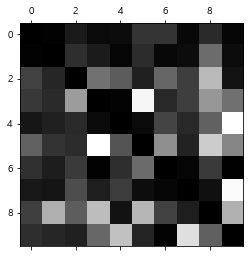

In [73]:
np.fill_diagonal(norm_conf_mx, 0)
plt.matshow(norm_conf_mx,cmap=plt.cm.gray)
plt.show()

행은 실제 클래스를 나타내고 열은 예측한 클래스를 나타낸다. 에러가 정확하게 대칭은 아니다.

In [74]:
# 숫자 그림을 위한 추가 함수
def plot_digits(instances, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(instances), images_per_row)
    images = [instance.reshape(size,size) for instance in instances]
    n_rows = (len(instances) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(instances)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = matplotlib.cm.binary, **options)
    plt.axis("off")

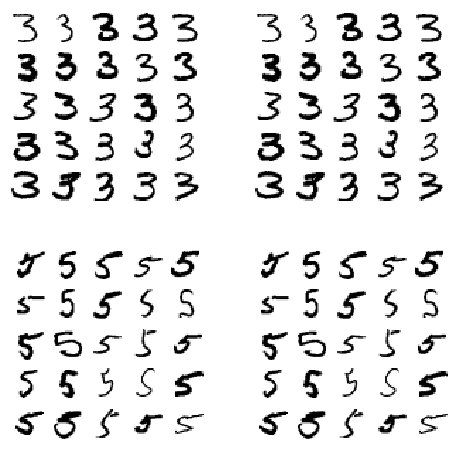

In [75]:
cl_a,cl_b=3,5
X_aa=X_train[(y_train == cl_a)&(y_train_pred==cl_a)]
X_ab=X_train[(y_train == cl_a)&(y_train_pred==cl_a)]
X_ba=X_train[(y_train == cl_b)&(y_train_pred==cl_b)]
X_bb=X_train[(y_train == cl_b)&(y_train_pred==cl_b)]

plt.figure(figsize=(8,8))
plt.subplot(221); plot_digits(X_aa[:25], images_per_row=5)
plt.subplot(222); plot_digits(X_ab[:25], images_per_row=5)
plt.subplot(223); plot_digits(X_ba[:25], images_per_row=5)
plt.subplot(224); plot_digits(X_bb[:25], images_per_row=5)
plt.show()


# 3.6 다중 레이블 분류

위에서 살펴본 내용은 데이터가 하나의 클래스에만 분류되는 경우만 살펴보았다. 하지만, 데이터에 따라 여러개의 클래스에 분류해야하는 경우가 있다. 이러한 경우를 다중 레이블 분류(multilabel classification)이라고 한다.

아래의 예제는 kNN알고리즘을 이용한 KNeighborClassifier 분류기를 사용해 첫번째 클래스는 7보다 크거나 같은지(>=7), 두 번째 클래스는 홀수(odd)인지를 분류하는 다중 레이블 분류 예제이다.

In [76]:
from sklearn.neighbors import KNeighborsClassifier

y_train_large=(y_train>=7)
y_train_odd =(y_train % 2 ==1)
y_multilabel = np.c_[y_train_large, y_train_odd]

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train,y_multilabel)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [77]:
knn_clf.predict([some_digit])

array([[ True,  True]])

In [ ]:
#내 노트북으론 무리..
#y_train_knn_pred=cross_val_predict(knn_clf, X_train, y_multilabel, cv=3, n_jobs=-1)
#f1_score(y_multilabel, y_train_knn_pred, average='macro')

# 3.7 다중 출력 분류

In [ ]:
noise = rnd.randint(0,100,(len(X_train),784))
X_train_mod = X_train+noise
noise=rnd.randint(0,100, (len(X_test),784))
X_test_mod= X_test + noise
y_train_mod = X_train
y_test_mod = X_test

In [ ]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.binary,
               interpolation="nearest")
    plt.axis("off")

In [ ]:
some_index = 5501
plt.subplot(121); plot_digit(X_test_mod[some_index])
plt.subplot(122); plot_digit(y_test_mod[some_index])
plt.show()

In [ ]:
knn_clf.fit(X_train-mod, y_train_mod)
clean_digit = knn_clf.predict([X_test_mod[some_index]])
plot_digit(clean_digit)